# 4. Reporte de métricas y conclusiones

In [37]:
from datasets import load_dataset
import pandas as pd
import nltk
import numpy as np
import matplotlib as plt
import multiprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import word_tokenize, TreebankWordTokenizer, RegexpTokenizer
from nltk import ngrams
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from time import time
from stop_words import get_stop_words
import unicodedata
import re
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split # Modelado
from sklearn.pipeline import Pipeline # Modelado
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Modelado
from sklearn.feature_selection import chi2 # Reporte
from sklearn.linear_model import LogisticRegression # Reporte
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve # Reporte
import joblib



In [38]:
# Importamos los datos
path = r'C:\Users\CARLES\1.CARLES\FORMACIONES\BOOTCAMP KEEPCODING\10. NLP'

clean_df = pd.read_csv(f'{path}\\reduced_df_clean_nlp.csv')

In [39]:
# Path
csv_path = r'C:\Users\CARLES\1.CARLES\FORMACIONES\BOOTCAMP KEEPCODING\10. NLP'

# Cargar el DataFrame desde el archivo CSV
X_train = pd.read_csv(f'{csv_path}\\X_train.csv')
X_test = pd.read_csv(f'{csv_path}\\X_test.csv')
y_train = pd.read_csv(f'{csv_path}\\y_train.csv')
y_test = pd.read_csv(f'{csv_path}\\y_test.csv')

Regresion Logistica

In [40]:
# Importamos los modelos y las predicciones hechas en la etapa 3
archivo_c_params = 'c_params.pkl'
archivo_cv = 'cv_tfidf_vectorizer.pkl'
modelo_lr = 'logistic_regression_model_nlp.pkl'
archivo_predicciones = 'predicciones_test_lr.pkl'
archivo_train_acc = 'train_acc_lr.pkl'
archivo_test_acc = 'test_acc_lr.pkl'

# Lo cargamos en las distintas variables
c_params = joblib.load(archivo_c_params)
cv_importado = joblib.load(archivo_cv)
lr_importado = joblib.load(modelo_lr)
test_predict = joblib.load(archivo_predicciones)
train_acc = joblib.load(archivo_train_acc)
test_acc = joblib.load(archivo_test_acc)


In [41]:
# Transformación de Características de Texto con TF-IDF
X_train_ = cv_importado.transform(X_train)
X_test_ = cv_importado.transform(X_test)

# Métricas

In [42]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[75188  7726]
 [11685 24265]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     82914
           1       0.76      0.67      0.71     35950

    accuracy                           0.84    118864
   macro avg       0.81      0.79      0.80    118864
weighted avg       0.83      0.84      0.83    118864

Accuracy score:0.8366957194777225


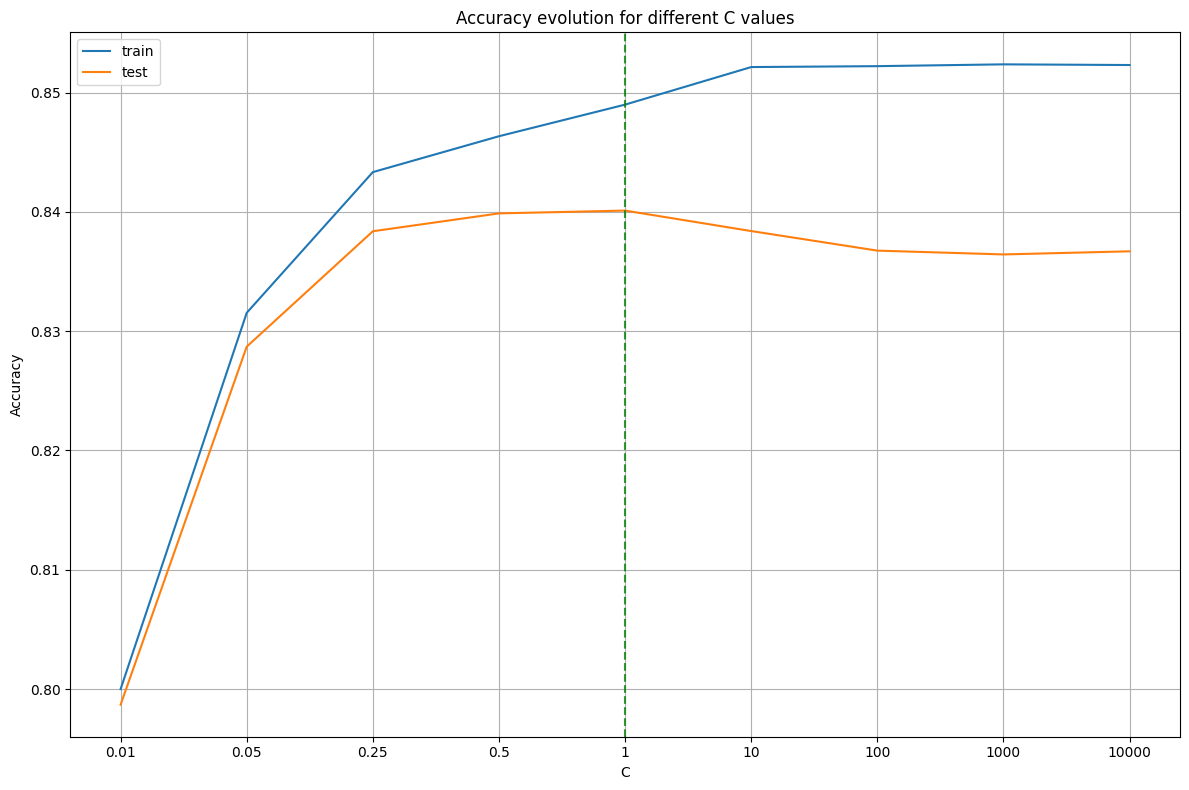

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [44]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

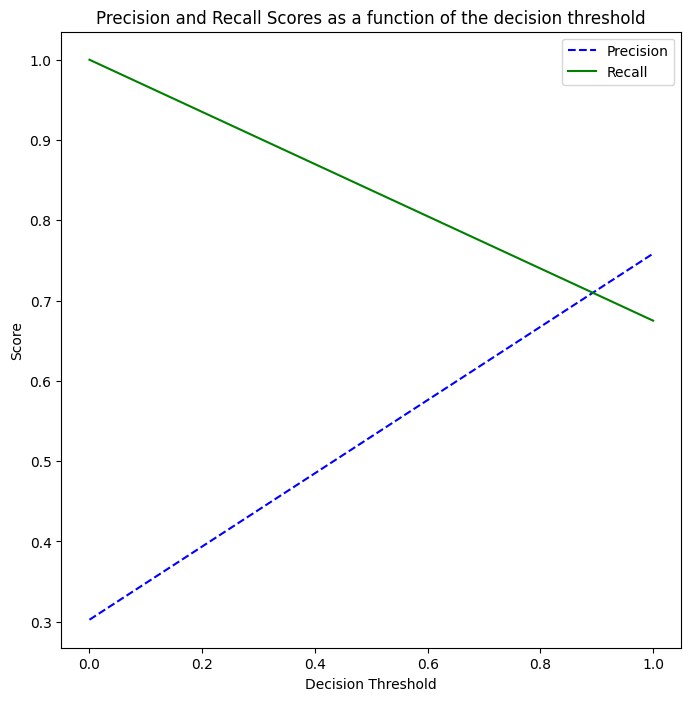

In [46]:
plot_precision_recall_vs_threshold(p, r, thresholds)

# CONCLUSIONES

Performance General: El modelo muestra un buen performance con un accuracy score de 83.66%, lo cual significa que acierta en aproximadamente el 84% de las predicciones sobre el conjunto de prueba.

Precision y Recall: La precisión para la clase 0 (87%) es más alta que para la clase 1 (76%), lo que sugiere que el modelo es mejor para predecir instancias negativas. 

F1-score: El F1-score balancea precisión y recall. Aunque es más alto para la clase 0 (0.89) que para la clase 1 (0.73), muestra que el modelo tiene un rendimiento aceptable en general.

Desbalance de Clases: La clase 0 tiene un soporte mucho mayor que la clase 1 (82,914 vs. 35,950)